In [14]:
import os
import ast

import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from matplotlib.pyplot import rc_context

import anndata as ad
import scanpy as sc

import umap 
import pickle

from metaspace import SMInstance

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MultiLabelBinarizer

from metadata import get_meta_df

In [3]:
from random import shuffle
l = [0,1,2,3,4,5,6]
shuff = 1
if shuff == 1:
    shuffle(l)
print(l)

[4, 3, 0, 5, 2, 6, 1]


In [2]:
ionvecs12 = 'vectors_TheoNo1No2_nhalf_rw_rw.tsv'
meta12 = 'metadata_TheoNo1No2_nhalf_rw_rw.tsv'

meta_df = get_meta_df(ionvecs12, meta12)

In [3]:
iv = pd.read_csv(ionvecs12, sep = '\t', header= None)
iv.T

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,-1.470291,0.142677,-1.646319,0.061558,0.162706,0.012423,-0.016671,-1.668498,0.274638,0.075418,...,-0.122561,-0.060999,-0.229406,-0.130498,0.099062,0.012155,-0.199682,-0.096475,-0.019415,0.110585
1,0.618924,0.467144,0.625145,0.384829,0.519233,0.323199,0.529325,0.636973,0.459870,0.487019,...,-0.008276,0.156768,-0.346211,0.094617,0.016236,-0.012830,0.191199,0.154648,0.025314,-0.221364
2,-2.143967,-0.556273,-2.262183,-0.533167,-0.567389,-0.388975,-0.734389,-2.241468,-0.331424,-0.431939,...,0.674778,0.469140,0.994363,0.605459,0.775655,0.697942,0.721724,0.607980,0.732285,0.701642
3,0.064357,1.087971,0.055549,1.102946,0.979773,1.151320,1.330433,0.343025,1.170864,1.175067,...,0.182685,0.134082,-0.202648,-0.032173,0.067184,0.123269,0.025009,0.031793,-0.052559,0.024603
4,-0.285058,0.508509,-0.161288,0.441370,0.339670,0.571710,0.597015,-0.107694,0.455687,0.435339,...,0.882820,1.003798,0.799999,0.802941,1.202341,1.105850,0.961199,0.861150,0.768962,0.856055
5,0.125234,-0.499409,0.417609,-0.468864,-0.495632,-0.527859,-0.693897,-0.457504,-0.478445,-0.373580,...,-0.182879,-0.242630,-0.026704,-0.124301,-0.115290,-0.044363,-0.284392,-0.145776,-0.251000,-0.173870
6,-0.140566,-0.594973,-0.170395,-0.538272,-0.541931,-0.698874,-0.800044,-0.507570,-0.726411,-0.394518,...,-1.322991,-1.313087,-0.764725,-1.290943,-0.828899,-0.901381,-1.280599,-1.286639,-1.165976,-1.352072
7,0.048240,-0.942938,-0.021293,-0.939291,-0.928894,-0.979902,-0.884675,-0.272855,-0.941872,-0.884972,...,0.172549,-0.008272,0.019950,0.005286,0.072901,-0.021616,0.327887,0.126712,0.349279,0.054507
8,-0.481414,0.004531,-0.391757,0.059702,0.087442,0.124132,0.197587,-0.525698,-0.337510,-0.194221,...,0.181712,0.101150,0.101540,0.299103,0.197164,0.354409,-0.019176,0.156375,-0.038421,0.166548
9,-0.366146,-0.579394,-0.578239,-0.554465,-0.405590,-0.804035,-0.641267,-0.442939,-0.397731,-0.519638,...,-0.196904,0.161770,-0.087886,0.105077,0.027680,-0.075062,0.106798,0.121408,0.116719,-0.070089


In [4]:
adata = ad.AnnData(iv) #transpose

/tmp/ipykernel_45863/2015567863.py:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(iv) #transpose
/home/geng/my-conda-envs/ScanpyEnv/lib/python3.10/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [5]:
adata

AnnData object with n_obs × n_vars = 257 × 20

In [6]:
adata.X

array([[-1.4702914 ,  0.61892414, -2.143967  , ..., -0.94995874,
        -0.35764846, -0.04582794],
       [ 0.14267686,  0.4671442 , -0.55627334, ..., -1.161691  ,
        -0.40640554, -0.75128996],
       [-1.6463195 ,  0.6251447 , -2.2621834 , ..., -0.792271  ,
        -0.5045283 ,  0.06933905],
       ...,
       [-0.09647536,  0.15464766,  0.6079801 , ...,  0.06897227,
        -0.17520882,  0.875023  ],
       [-0.01941539,  0.02531359,  0.73228544, ...,  0.1313561 ,
        -0.20835659,  0.5920658 ],
       [ 0.1105852 , -0.22136423,  0.7016421 , ...,  0.11674657,
        -0.24237123,  0.50989294]], dtype=float32)

In [7]:
adata.obs_names = meta_df['ion']

In [8]:
adata.var_names = [f"Embedding_{i+1:d}" for i in range(adata.n_vars)]

In [9]:
adata.obs

""
ion
C9H17NO4+H+
C10H7NO3+Na+
C24H50NO7P+H+
C4H9N3O2+K+
C10H11NO+Na+
...
C28H56NO7P+H+
C9H9NO3+H+
C25H50NO7P+H+


In [10]:
col_list = meta_df.drop(columns=['ion', 'umap_x', 'umap_y', 'dataset_ids', 'ds_names', 'encoded_ds']).columns.tolist()
for col in col_list:
    adata.obs[col] = meta_df[col].to_numpy()

In [11]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)

In [12]:
sc.tl.leiden(adata, key_added='clusters', resolution=0.5)

/home/geng/my-conda-envs/ScanpyEnv/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


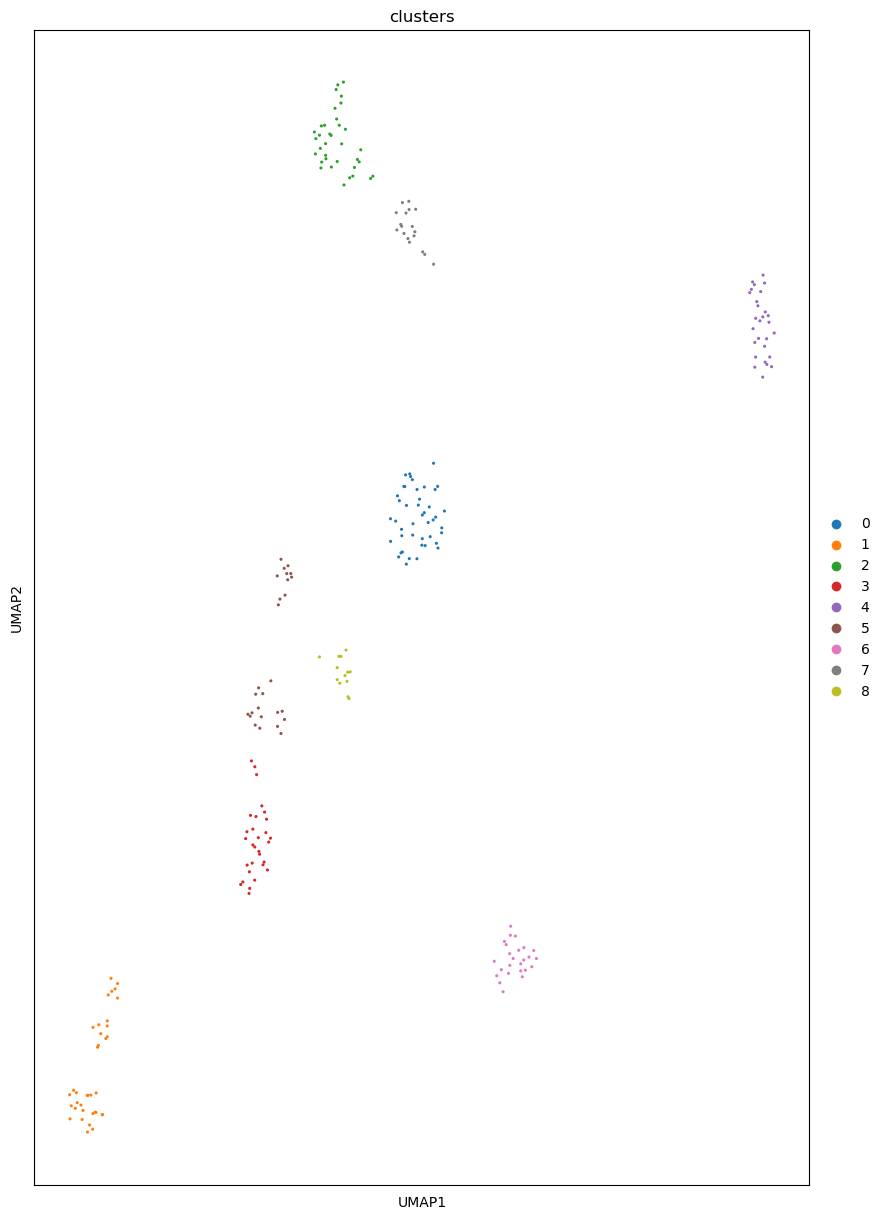

In [18]:
with rc_context({'figure.figsize': (10, 15)}):
    sc.pl.umap(adata, s = 20, color='clusters')

In [16]:
sc.tl.tsne(adata)

/home/geng/my-conda-envs/ScanpyEnv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


/home/geng/my-conda-envs/ScanpyEnv/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


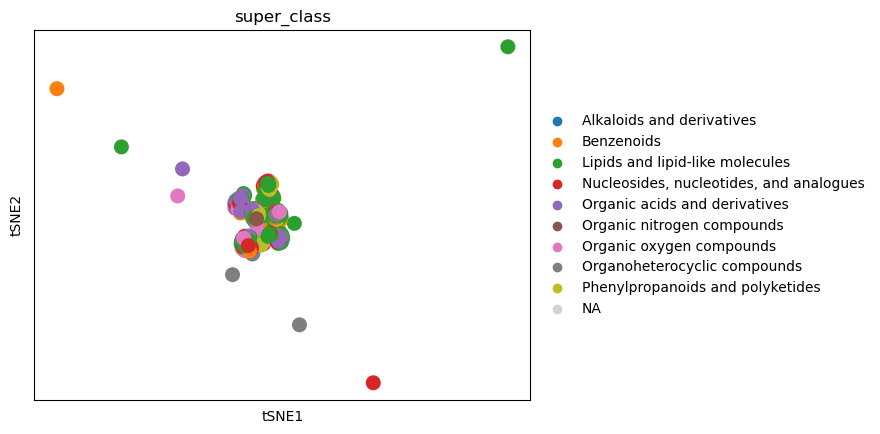

In [17]:
sc.pl.tsne(adata, color = 'super_class')

In [ ]:
with rc_context({'figure.figsize': (5, 5)}):
    sc.pl.umap(pbmc, color='clusters', add_outline=True, legend_loc='on data',
               legend_fontsize=12, legend_fontoutline=2,frameon=False,
               title='clustering of cells', palette='Set1')

In [19]:
adata.write('ion2vec_results.h5ad', compression="gzip")

0      [2017-08-03_15h09m06s, 2017-08-11_07h59m58s, 2...
1           [2017-08-03_15h09m06s, 2017-08-03_15h09m51s]
2      [2017-08-03_15h09m06s, 2017-08-11_07h59m58s, 2...
3      [2017-08-03_15h09m06s, 2017-08-11_07h59m58s, 2...
4      [2017-08-03_15h09m06s, 2017-08-03_15h09m51s, 2...
                             ...                        
252                               [2017-05-17_19h49m04s]
253                               [2017-05-17_19h49m04s]
254                               [2017-05-17_19h49m04s]
255                               [2017-05-17_19h49m04s]
256                               [2017-05-17_19h49m04s]
Name: dataset_ids, Length: 257, dtype: object

In [ ]:
from 